In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


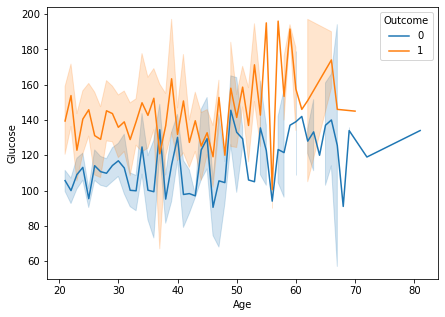

In [6]:
plt.figure(figsize=(7, 5))
sns.lineplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

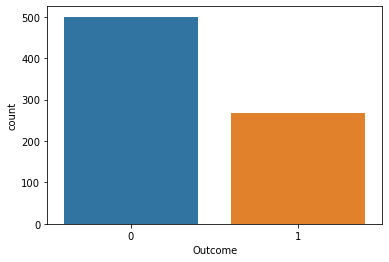

In [7]:
#From the above graph it is very much clear that people with high glucose levels are more likely to have diabetes.
sns.countplot(x='Outcome',data=data)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

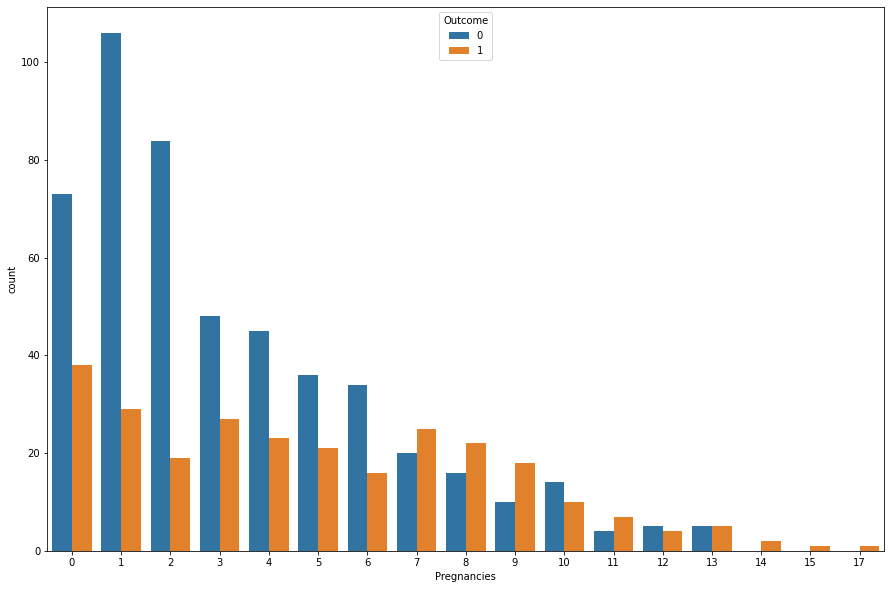

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(x='Pregnancies',hue='Outcome',data=data)

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

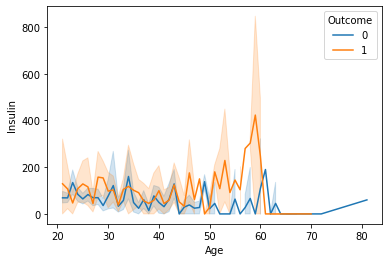

In [9]:
sns.lineplot(x='Age',y='Insulin',hue='Outcome',data=data)

In [10]:
data.shape

(768, 9)

In [11]:
data.isnull().values.any()

False

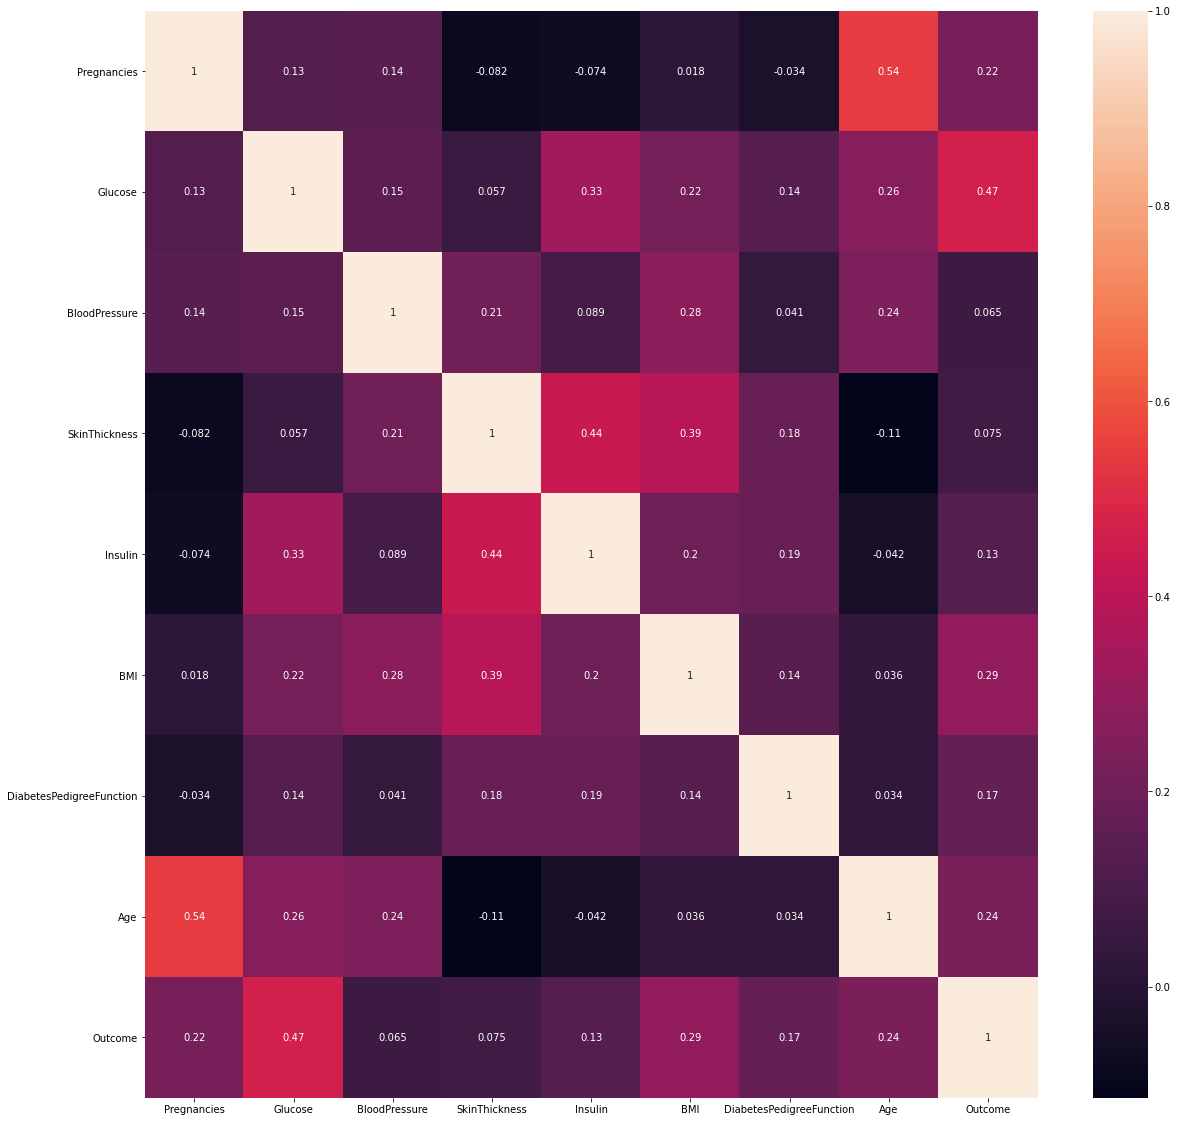

In [12]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
Y=data["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
X=data.drop("Outcome",axis=1)

In [16]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [17]:
X=X.astype(float)

In [18]:
X.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

In [19]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0


In [20]:
lst=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]

In [21]:
for i in lst:
  tem=X[i]
  mean=X[i].mean()
  for j in range(len(tem)):
    if tem[j]==0:
      tem[j]=mean
  X.replace(i,tem,inplace=True)

In [22]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50.0
1,1.0,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31.0
2,8.0,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32.0
3,1.0,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0
4,0.0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0
5,5.0,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30.0
6,3.0,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0
7,10.0,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29.0
8,2.0,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0
9,8.0,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54.0


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #NOW LETS NORMALISE OUR DATASET ANT THEN FEED IT INTO OUR MODEL
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
import tensorflow as tf
ann = tf.keras.Sequential()

In [25]:
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [26]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

AttributeError: The layer has never been called and thus has no defined input shape.

In [ ]:
ann.fit(X_train,y_train,batch_size=12,epochs=100)

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.75)

In [ ]:
for i in range(len(y_pred)):
    print("Predicted %d------> Expected %d" %(y_pred[[i]],y_test[i]))

In [ ]:
# As we can see here that using batch propagation is not much helpful in small datasets

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
acc = accuracy_score(y_pred,y_test)

In [ ]:
cm

In [ ]:
acc